In [1]:
# Imports
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os

In [2]:
# Function to get data
def read_csv(path): 
    """
    Extracts dataframe from CSV

    Parameters
    -----
    path: str
        The path to the file to be opened as a csv

    Return
    -----
    result: Pandas dataframe
        If path has .csv extension, returns content of the csv file
        Else, returns None
    """
    result = None
    
    if path.endswith('.csv'): 
        result = pd.read_csv(path)
    return result

In [3]:
# Function to plot data
df_column_mapping = {
    'x' : 3,
    'y' : 4,
    'z' : 5
}

axis_listing = ['x', 'y', 'z']

def plot_in_3d(df, t = ''):   
    """
    Plots the summation of x-, y-, and z-axes in 3D space

    Parameters
    -----
    df: Pandas dataframe
        dataframe extracted from csv    
    """  
    # Initialize figure and 3d projection
    fig = plt.figure(figsize = [10, 10])
    ax = fig.add_subplot(111, projection = '3d')
    # Label axes
    ax.set(xlabel = df.columns[3], ylabel = df.columns[4], zlabel = df.columns[5], title = t) 
    
    # Get datapoints
    x = df.iloc[:, 3]
    y = df.iloc[:, 4]
    z = df.iloc[:, 5]
    
    # Plot
    ax.plot(x, y, z)
    
    # Metadata
    plt.title(t)
    
    plt.show()
    
def plot_time(df, var = 'x', t = ''):
    """
    Plots the desired parameter against time
    
    Parameters:
    -----
    df: Pandas dataframe
        The pandas dataframe containing the data from the acceleromere
    var: str
        The axis 'x', 'y', 'z' to be plotted; defaults to 'x'
    """
    # Check that var is 'x', 'y', or 'z'
    # Defaults to 'x' if not used
    if var not in axis_listing:
        var = 'x'
    
    # Get data
    time = df.iloc[:, 2]
    data = df.iloc[:, df_column_mapping[var]]
    
    # Initialize figure
    fig = plt.figure(figsize = [15, 5])
    ax = fig.add_subplot(111)
    # Label axes
    ax.set(xlabel = df.columns[2], ylabel = df.columns[df_column_mapping[var]], title = t) 
    # Customize the major grid
    ax.grid(b=True, which='both')
    
    # Plot
    ax.plot(time, data)
    
    # Metadata
    plt.title(t)

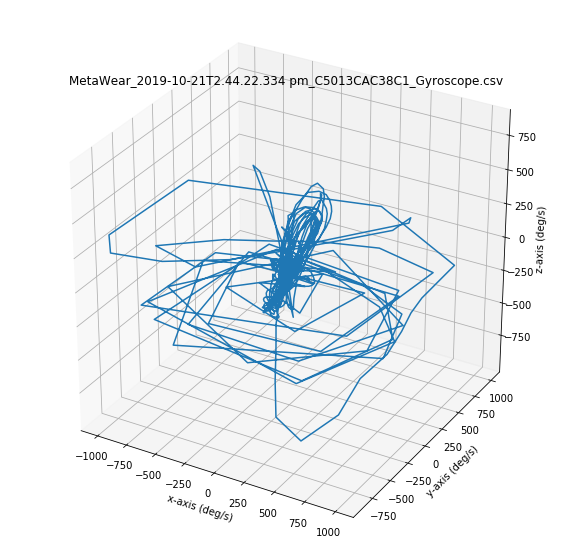

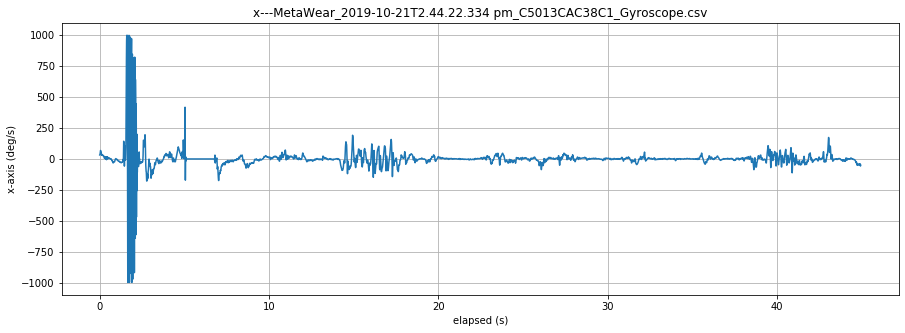

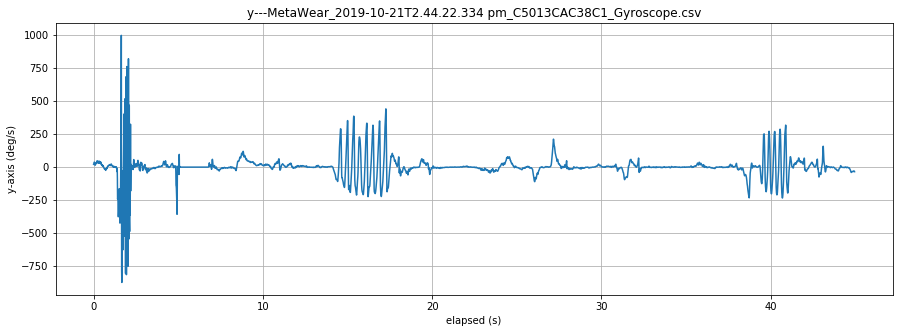

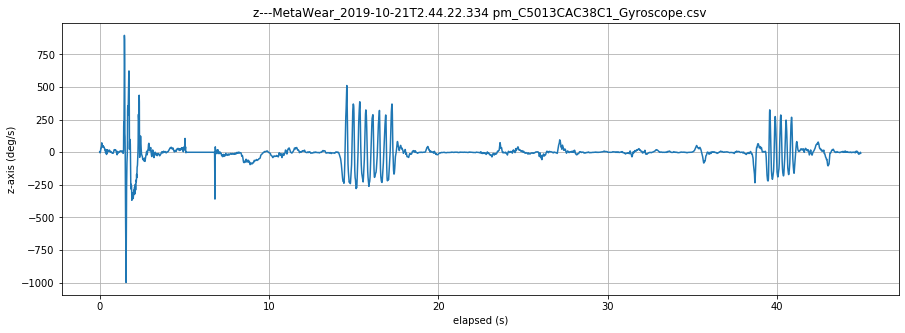

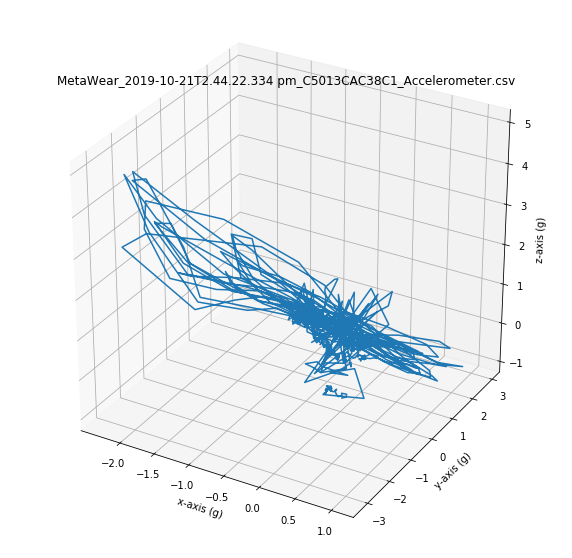

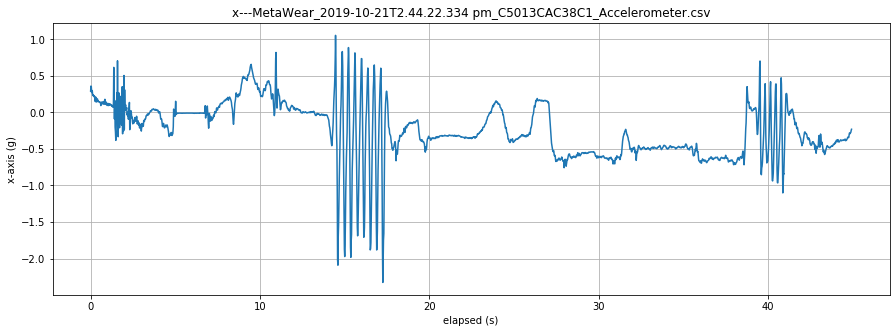

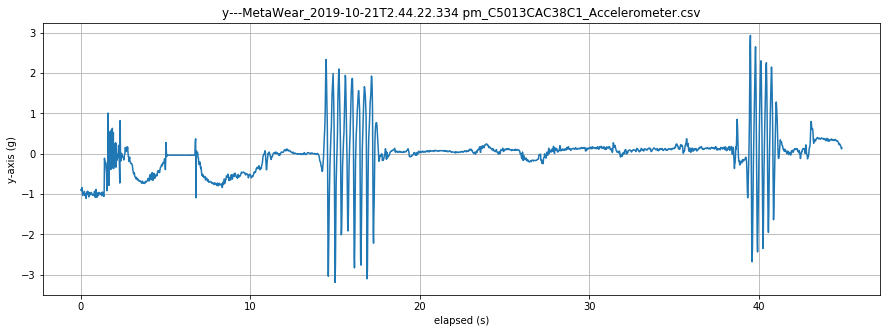

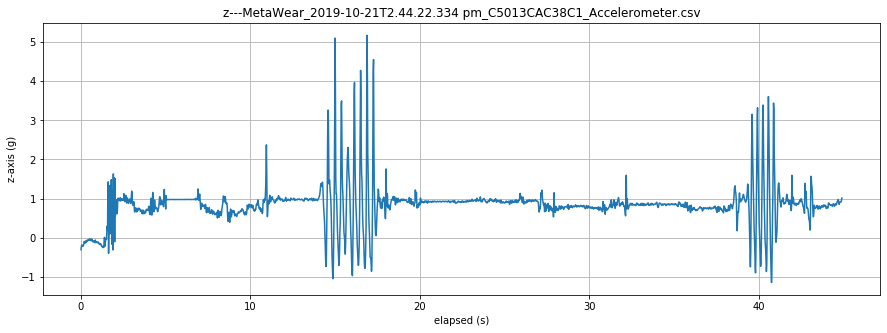

In [4]:
directory = os.listdir()

for file in directory:
    df = read_csv(file)
    
    if df is None:
        continue
        
    plot_in_3d(df, t = file)
    
    for a in axis_listing:
        plot_time(df, var = a, t = a + '---' + file)

# Archive

In [5]:
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)
r = np.sqrt(x ** 2 + y ** 2)
# z = np.sin(r)
# surf = ax.plot_surface(
#     x, y, z, 
#     rstride = 1, cstride = 1,
#     cmap = cm.coolwarm, linewidth = 0,
#     antialiased = False
# )
# ax.set_zlim(-1.01, 1.01)

# r